<a href="https://colab.research.google.com/github/satyajitghana/TSAI-DeepVision-EVA4.0/blob/master/08_AdvancedArchitecture/ResNet18.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ResNet18 Model

## Install the PySodium Library

In [1]:
!pip install --upgrade --no-deps --force-reinstall git+https://github.com/satyajitghana/PySodium.git#egg=sodium

  Cloning https://github.com/satyajitghana/PySodium.git to /tmp/pip-install-7su3vxwf/sodium
  Running command git clone -q https://github.com/satyajitghana/PySodium.git /tmp/pip-install-7su3vxwf/sodium
  Created wheel for sodium: filename=sodium-0.0.1-cp36-none-any.whl size=12731 sha256=5a870c35c9dc7f3cd633af3664ad04f8c6625aa85fd656b7306381924c56b193
  Stored in directory: /tmp/pip-ephem-wheel-cache-a0qzl73h/wheels/ed/b2/24/860b8aa92c98c5b8e1e724d604e3c4bf4039ab8bb7f66bcc82
Successfully built sodium


## Create a config file

In [2]:
%%writefile cifar.yml
name: CIFAR10_MyNet
save_dir: saved/
seed: 1
target_device: 0

arch:
    type: CIFAR10S8Model
    args: {}

augmentation:
    type: CIFAR10Transforms
    args: {}

data_loader:
    type: CIFAR10DataLoader
    args:
        batch_size: 512
        data_dir: data/
        nworkers: 4
        shuffle: True

criterion: cross_entropy_loss

lr_scheduler:
    type: OneCycleLR
    args:
        max_lr: 0.1

optimizer:
    type: SGD
    args:
        lr: 0.001
        momentum: 0.95
        weight_decay: 0.0005

training:
    epochs: 15


Writing cifar.yml


## Import sodium

In [0]:
from sodium.utils import load_config
import sodium.runner as runner

## Create a runner with the config and train the model

In [4]:
config = load_config('cifar.yml')
runner = runner.Runner(config)
runner.train(tsai_mode=True)

[ 2020-03-06 16:46:08,154 - sodium.sodium.runner ] INFO: Training: {'name': 'CIFAR10_MyNet', 'save_dir': 'saved/', 'seed': 1, 'target_device': 0, 'arch': {'type': 'CIFAR10S8Model', 'args': {}}, 'augmentation': {'type': 'CIFAR10Transforms', 'args': {}}, 'data_loader': {'type': 'CIFAR10DataLoader', 'args': {'batch_size': 512, 'data_dir': 'data/', 'nworkers': 4, 'shuffle': True}}, 'criterion': 'cross_entropy_loss', 'lr_scheduler': {'type': 'OneCycleLR', 'args': {'max_lr': 0.1}}, 'optimizer': {'type': 'SGD', 'args': {'lr': 0.001, 'momentum': 0.95, 'weight_decay': 0.0005}}, 'training': {'epochs': 15}}
[ 2020-03-06 16:46:08,161 - sodium.sodium.utils.config ] INFO: Building: sodium.tsai_model.CIFAR10S8Model
[ 2020-03-06 16:46:08,368 - sodium.sodium.utils.config ] INFO: Using device 0 of available devices [0]
[ 2020-03-06 16:46:17,400 - sodium.sodium.utils.config ] INFO: Building: torch.optim.SGD
[ 2020-03-06 16:46:17,401 - sodium.sodium.utils.config ] INFO: Building: sodium.data_loader.augmen


Extracting data/cifar-10-python.tar.gz to data/
Files already downloaded and verified
[ 2020-03-06 16:46:23,794 - sodium.sodium.runner ] INFO: Building: torch.optim.lr_scheduler.OneCycleLR
[ 2020-03-06 16:46:23,796 - sodium.sodium.runner ] INFO: Getting loss function handle
[ 2020-03-06 16:46:23,797 - sodium.sodium.runner ] INFO: Initializing trainer
[ 2020-03-06 16:46:23,798 - sodium.sodium.base.base_trainer ] INFO: Starting training ...
[ 2020-03-06 16:46:23,799 - sodium.sodium.base.base_trainer ] INFO: Training the model for 15 epochs

Training Epoch: 1



Testing Epoch: 1
Test Set: Average Loss: 1.42361643, Accuracy: 48.50 (4850/10000)

Training Epoch: 2



Testing Epoch: 2
Test Set: Average Loss: 1.17520726, Accuracy: 60.34 (6034/10000)

Training Epoch: 3



Testing Epoch: 3
Test Set: Average Loss: 1.34524592, Accuracy: 60.76 (6076/10000)

Training Epoch: 4



Testing Epoch: 4
Test Set: Average Loss: 0.97108720, Accuracy: 68.62 (6862/10000)

Training Epoch: 5



Testing Epoch: 5
Test Set: Average Loss: 0.76128990, Accuracy: 75.52 (7552/10000)

Training Epoch: 6



Testing Epoch: 6
Test Set: Average Loss: 0.86219907, Accuracy: 73.52 (7352/10000)

Training Epoch: 7



Testing Epoch: 7
Test Set: Average Loss: 0.72637126, Accuracy: 76.19 (7619/10000)

Training Epoch: 8



Testing Epoch: 8
Test Set: Average Loss: 0.50018728, Accuracy: 82.85 (8285/10000)

Training Epoch: 9



Testing Epoch: 9
Test Set: Average Loss: 0.58701713, Accuracy: 81.57 (8157/10000)

Training Epoch: 10



Testing Epoch: 10
Test Set: Average Loss: 0.40272861, Accuracy: 86.46 (8646/10000)

Training Epoch: 11



Testing Epoch: 11
Test Set: Average Loss: 0.40040143, Accuracy: 87.02 (8702/10000)

Training Epoch: 12



Testing Epoch: 12
Test Set: Average Loss: 0.37278319, Accuracy: 87.57 (8757/10000)

Training Epoch: 13



Testing Epoch: 13
Test Set: Average Loss: 0.31379666, Accuracy: 89.80 (8980/10000)

Training Epoch: 14



Testing Epoch: 14
Test Set: Average Loss: 0.28488835, Accuracy: 90.84 (9084/10000)

Training Epoch: 15



Testing Epoch: 15
Test Set: Average Loss: 0.28283156, Accuracy: 90.76 (9076/10000)
[ 2020-03-06 16:53:34,163 - sodium.sodium.runner ] INFO: Finished!


## Plot the metrics

[ 2020-03-06 16:53:34,177 - sodium.sodium.runner ] INFO: Plotting Metrics...


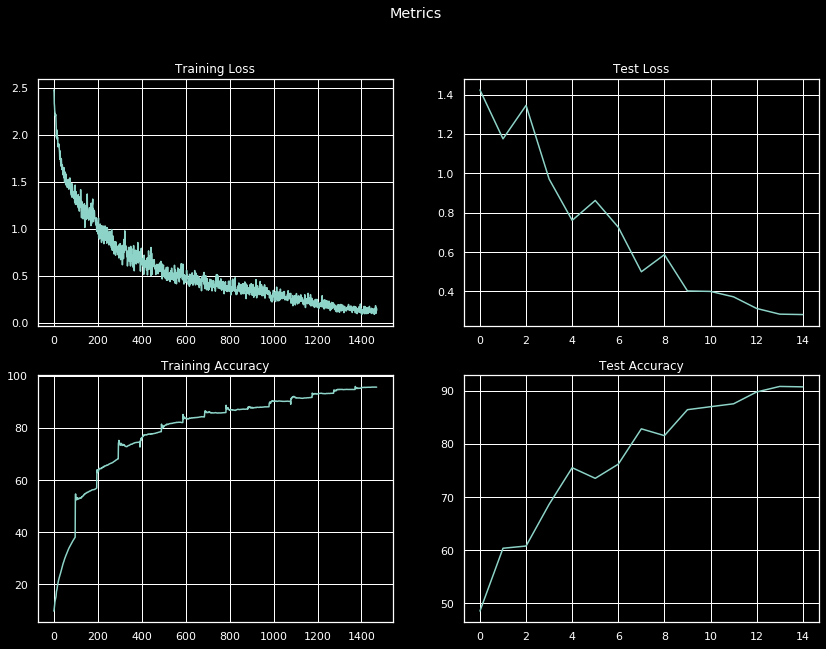

In [5]:
runner.plot()